In [1]:
import IPython.display as ipd
import librosa
import librosa.display
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wav, sr = librosa.load(librosa.ex("trumpet"))

# # sin
# sr = 44100
# f = 1000
# amp = 10**(-40/20)
# wav = amp*np.sin(2*np.pi*f*np.arange(100000)/sr)

In [3]:
wav = wav[:sr*3]
wav.shape

(66150,)

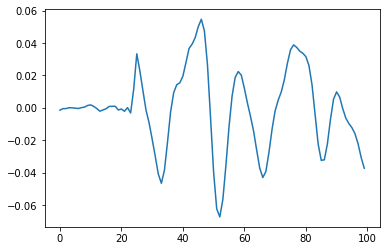

In [4]:
plt.plot(wav[:100])

In [5]:
n_fft = 2048
hop_length = 512
n_mels = 128
power = 2.

In [6]:
melspec, _ = librosa.feature.melspectrogram(wav, 
                                sr=sr, 
                                n_mels=n_mels,
                                n_fft=n_fft, 
                                hop_length=hop_length, 
                                win_length=n_fft, 
                                window="hann", 
                                center=True, 
                                pad_mode = "constant", 
                                power=power)

/var/folders/1g/912b41091855kd9w5h7bz27c0000gn/T/ipykernel_46347/4221482076.py:1: FutureWarning: Pass y=[-0.00140682 -0.00044607 -0.00041098 ...  0.01403542  0.01173
  0.0083307 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspec, _ = librosa.feature.melspectrogram(wav,


ValueError: too many values to unpack (expected 2)

In [ ]:
melspec, (mel_f, fftfreqs, fdiff, ramps) = librosa.feature.melspectrogram(wav, 
                                sr=sr, 
                                n_mels=n_mels,
                                n_fft=n_fft, 
                                hop_length=hop_length, 
                                win_length=n_fft, 
                                window="hann", 
                                center=True, 
                                pad_mode = "constant", 
                                power=power,
                                # htk=True,
                                )

In [ ]:
# Scratch Mel Spectrogram

S = librosa.stft(y=wav, 
                n_fft=n_fft, 
                hop_length=hop_length, 
                win_length=n_fft, 
                window="hann", 
                center=True, 
                pad_mode="constant")

S_spectrogram = np.abs(S) ** power

In [ ]:
"""
HTK formula

Slaney

"""
mel_basis = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

In [ ]:
fig, axes = plt.subplots(nrows=3)

# mel 0
axes[0].plot(mel_basis[0], "o")
axes[0].set_xlim(0, 10)

# mel 1
axes[1].plot(mel_basis[1], "o")
axes[1].set_xlim(0, 10)

# mel 2
axes[2].plot(mel_basis[2], "o")
axes[2].set_xlim(2, 12)

In [ ]:
fig, ax = plt.subplots()
img = librosa.display.specshow(mel_basis, x_axis='linear', ax=ax)
ax.set(ylabel='Mel filter', title='Mel filter bank')
fig.colorbar(img, ax=ax)

In [ ]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(melspec, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                          y_axis='mel', sr=sr,
                          fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')